In [1]:
%matplotlib inline
import re
import collections
import operator
import codecs
import itertools
import numpy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Trump: 3,690 total
trumpfile = open('trumptweets2.txt', encoding="utf8")
ttweets = trumpfile.read()

In [5]:
# display a sample of Trumps tweets
ttweets[:1000]

'"@KathyCeurter: @realDonaldTrump please Mr.Trump make @SenatorJeffSessions your VP. He is a perfect running mate."  He is a great guy!\nBernie Sanders must really dislike Crooked Hillary after the way she played him. Many of his supporters, because of trade, will come to me.\n"@mabynshingleton: JohnKasich, the VOTERS have spoken.We want @realDonaldTrump. You AGREED to support NOMINEE. Get on board or leave @GOP"\n"@Dale_Dangler: @realDonaldTrump You will be the greatest president the world has ever seen"  Thanks.\nI would have had many millions of votes more than Crooked Hillary Clinton except for the fact that I had 16 opponents, she had one!\n"@nauthizjane: @realDonaldTrump Congratulations Mr. Trump."  Thank you!\n"@setfire2flames: Senator Sanders spent more than @realDonaldTrump yet lost."\nMAKE AMERICA GREAT AGAIN!\n#AmericaFirst #Trump2016 \nhttps://t.co/42OpVsjXjp\n"@lovusa4: @RichardWeaving Why @foxandfriends @NewDay WHERE IS THE REPORTING @realDonaldTrump &lt;MOST VOTES FOR PR

In [6]:
#method found at https://docs.python.org/2/library/collections.html
words = re.findall(r'\w+', ttweets)
trumpls = collections.Counter(words).most_common(54)
trumpls;

In [7]:
#Clinton: 3,189
clintonfile = open('clintontweets2.txt', encoding="utf-8");
ctweets = clintonfile.read();

In [8]:
# display a sample of Clintons tweets
ctweets[0:1000]

"“It’s a simple but powerful idea: We believe that we are stronger together.” —Hillary https://t.co/BpXIJZNcDy\nA note from Hillary. https://t.co/LHSZvl7ODF\nA headline 227 years in the making. https://t.co/7RDeQ3bQ3z https://t.co/IuHMa3tUTr\nHistory. https://t.co/CkDyWA2Bfv https://t.co/hI52yd3ATf\nFront pages from around the country on a big day. https://t.co/bNrJXn967S https://t.co/JA2R2R9drQ\nIf Hillary could go back in time and tell anyone she'd been nominated for president, it would be her mom. https://t.co/LfcqMPQ0ST\nLet’s keep making history, together.\nhttps://t.co/7IIvZVW3HY\nThank you, California! https://t.co/EgtQpT6JZT\nDon’t let anyone tell you that great things can’t happen in America. https://t.co/dtgjwmcfMm\nDon’t let anyone tell you great things can’t happen in America. Barriers can come down. Justice &amp; equality can win.\nhttps://t.co/5xcwapDvPJ\nText CONGRATS to 47246 to tell Hillary you're proud to be by her side all the way to the White House. https://t.co/bBC

In [9]:
#method found at https://docs.python.org/2/library/collections.html
words = re.findall(r'\w+', ctweets)
clintonls = collections.Counter(words).most_common(55)
clintonls;

In [10]:
# all the words in the top 20 most commonly used >1 letter
# plus a few that were clearly part of urls
# https://en.wikipedia.org/wiki/Most_common_words_in_English
commonwords = ('the', 'The', 'be', 'to', 'of', 'and','in','that','have','it',
               'for','not', 'on', 'with', 'he', 'as', 'you', 'do', 'that',
               'are', 'is', 'were', 'was', 'co', 're', 'https', 'amp')

In [11]:
# function to remove words in the common words list from a string
def keepelement(element):
    return not (element[0].startswith(commonwords) or len(element[0])==1)

cleantrump = list(filter(keepelement, trumpls))
cleanclinton = list(filter(keepelement, clintonls))

In [12]:
cleantrump

[('will', 475),
 ('Trump2016', 436),
 ('Trump', 419),
 ('Thank', 414),
 ('MakeAmericaGreatAgain', 293),
 ('me', 280),
 ('at', 260),
 ('great', 255),
 ('Hillary', 213),
 ('Cruz', 210),
 ('so', 209),
 ('my', 203),
 ('all', 200),
 ('people', 183),
 ('by', 179),
 ('has', 177),
 ('out', 165),
 ('from', 163),
 ('just', 155),
 ('CNN', 148),
 ('New', 148),
 ('this', 145),
 ('We', 145),
 ('his', 142),
 ('Ted', 134)]

In [13]:
cleanclinton

[('Hillary', 687),
 ('We', 452),
 ('we', 380),
 ('can', 271),
 ('our', 266),
 ('Trump', 248),
 ('this', 240),
 ('who', 216),
 ('need', 199),
 ('should', 175),
 ('president', 167),
 ('DemDebate', 164),
 ('at', 163),
 ('America', 150),
 ('make', 148),
 ('all', 145),
 ('It', 145),
 ('about', 141),
 ('families', 139),
 ('from', 136),
 ('will', 128),
 ('more', 126),
 ('or', 120),
 ('women', 119),
 ('people', 118)]

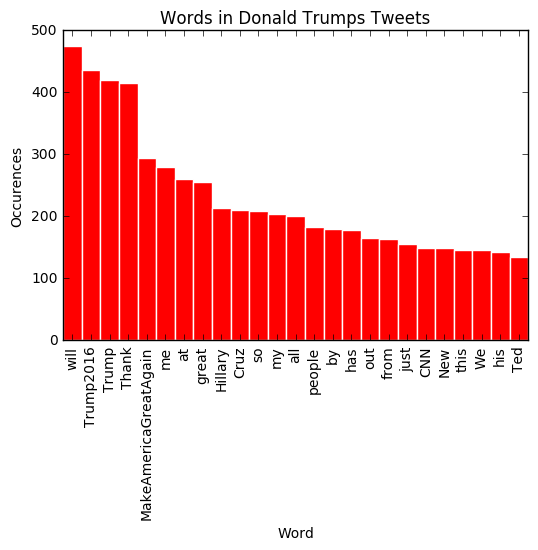

In [14]:
x = range(len(cleantrump))
y = [x[1] for x in cleantrump]
plt.bar(x, y, width= 1, color="red", edgecolor="white");
plt.xlabel('Word');
plt.ylabel('Occurences');
plt.title('Words in Donald Trumps Tweets');
plt.xticks(np.arange(.5,25.5), [x[0] for x in cleantrump], rotation=90);

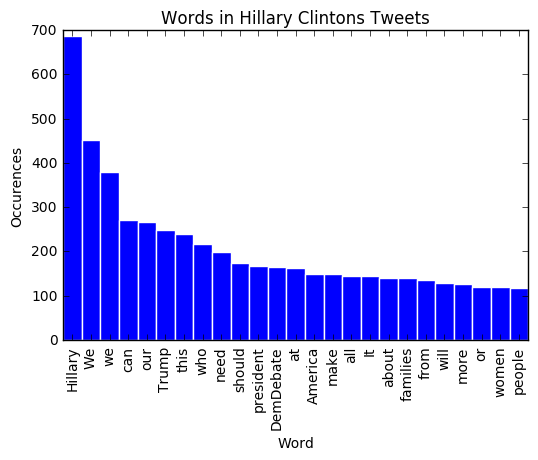

In [16]:
x = range(len(cleanclinton))
y = [x[1] for x in cleanclinton]
plt.bar(x, y, width=1, color="blue", edgecolor="white");
plt.xlabel('Word');
plt.ylabel('Occurences');
plt.title('Words in Hillary Clintons Tweets');
plt.xticks(np.arange(.5,25.5), [x[0] for x in cleanclinton], rotation=90);

In [17]:
# in what percent of tweets did Trump mention Clinton
mentionedc = (213/3690)
mentionedc

0.05772357723577236

In [18]:
# in what percent of tweets did Clinton mention Trump
mentionedt = (248/3189)
mentionedt

0.07776732518030731